# 1.1 Problema de los tres cuerpos restringido

## Sistemas gravitatorios
Un ejemplo destacado del problema clásico de tres cuerpos es el movimiento de un planeta con un satélite alrededor de una estrella. El caso general del problema de los tres cuerpos no tiene una solución conocida, y es abordado por aproximaciones de análisis numérico.

En la mayoría de los casos tal sistema puede ser factorizado, considerando el movimiento del sistema complejo (planeta y satélite) alrededor de una estrella como una sola partícula; entonces, considerando el movimiento del satélite alrededor del planeta, descuidando el movimiento alrededor de la estrella. En este caso, el problema se simplifica a dos casos del problema de dos cuerpos. El efecto de la estrella en el movimiento del satélite alrededor del planeta puede considerarse entonces como una perturbación.

Un problema de tres cuerpos también surge de la situación de una nave espacial y dos cuerpos celestes relevantes, p. la Tierra y la Luna, como cuando se considera una trayectoria de retorno libre alrededor de la Luna u otra inyección trans-lunar. Mientras que un vuelo espacial que implica una asistencia por gravedad tiende a ser al menos un problema de cuatro cuerpos (nave espacial, Tierra, Sol, Luna), una vez lejos de la Tierra cuando la gravedad de la Tierra se hace insignificante, es aproximadamente un problema de tres cuerpos.


# 1.2 Objetivos
## 1.21 Objetivo General
    El problema de los tres cuerpos consiste en determinar, en cualquier instante, las posiciones y velocidades de tres cuerpos, de cualquier masa, sometidos a atracción gravitacional mutua y partiendo de unas posiciones y velocidades dadas 

## 1.22 Objetivos especificos
    Simular el comportamiento de los tres cuerpos restringido circular el cual es un caso especial en que se asume que dos de los cuerpos están en órbitas circulares (lo cual es aproximadamente cierto para el sistema Sol-Tierra-Luna)
    

## 1.3 Modelo que represente el problema
La declaración general para el problema de los tres cuerpos es la siguiente. En un instante en el tiempo, para las posiciones vectoriales xi y las masas mi, existen tres ecuaciones diferenciales de segundo orden acopladas:
<img style="float: center; margin: 0px 0px 15px 15px;" src="https://wikimedia.org/api/rest_v1/media/math/render/svg/437419c1c38f4d77ff139d0f2754d2ee5207b5e0" width="300px" height="100px" />


Una solución completa para un problema particular de tres cuerpos proporcionaría las posiciones para las tres partículas durante todo el tiempo, dadas tres posiciones iniciales y velocidades iniciales. En general, no existe una solución de forma cerrada para tal problema, y se cree que la evolución temporal del sistema es caótica. El uso de ordenadores, sin embargo, hace que las soluciones de precisión arbitrariamente alta en un lapso de tiempo finito posible utilizando métodos numéricos para la integración de las trayectorias.
Parametros iniciales:
    Devido a que las masas de los planetas y la masa del sol son cantidades muy grandes establecimos una relación para cada una de ellas donde:
>- La masa del sol es igual     m1 = 16 
>- La masa de  la tierra es igual m2 = 0.1001
>- La masa de la luna es m3 = .00101
>- Y por ultimo la gravedad conforme a esta relación es  G= 1

Ademas el estado inicial es x0= [ -.02, 2.828, 3.4,0, 0, -0,0,0,0,0, 2, 2.2]

In [1]:
from matplotlib import animation, rc
from IPython.display import HTML
from matplotlib import animation
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from scipy.integrate import odeint
from scipy import integrate
#%matplotlib inline
%matplotlib nbagg


m1 = 16#sol
m2 = 0.1001#tierra
m3 = .00101#luna
G = 1
def dx(x, t):
    x1, x2, x3 = x[6], x[7], x[8]
    y1, y2, y3 = x[9], x[10], x[11]
    dx1 = -((G*m2*(x1-x2))/((x1-x2)**2+((y1-y2)**2))**(3/2)) -((G*m3*(x1-x3))/((x1-x3)**2+((y1-y3)**2))**(3/2))
    dx2 = -((G*m3*(x2-x3))/((x2-x3)**2+((y2-y3)**2))**(3/2)) -((G*m1*(x2-x1))/((x2-x1)**2+((y2-y1)**2))**(3/2))
    dx3 = -((G*m1*(x3-x1))/((x3-x1)**2+((y3-y1)**2))**(3/2)) -((G*m2*(x3-x2))/((x3-x2)**2+((y3-y2)**2))**(3/2))
    
    dy1 = -((G*m2*(y1-y2))/((x1-x2)**2+((y1-y2)**2))**(3/2)) -((G*m3*(y1-y3))/((x1-x3)**2+((y1-y3)**2))**(3/2))
    dy2 = -((G*m3*(y2-y3))/((x2-x3)**2+((y2-y3)**2))**(3/2)) -((G*m1*(y2-y1))/((x2-x1)**2+((y2-y1)**2))**(3/2))
    dy3 = -((G*m1*(y3-y1))/((x3-x1)**2+((y3-y1)**2))**(3/2)) -((G*m2*(y3-y2))/((x3-x2)**2+((y3-y2)**2))**(3/2))
    
    return [dx1, dx2, dx3, dy1, dy2, dy3, x[0], x[1], x[2], x[3], x[4], x[5]]

<IPython.core.display.Javascript object>


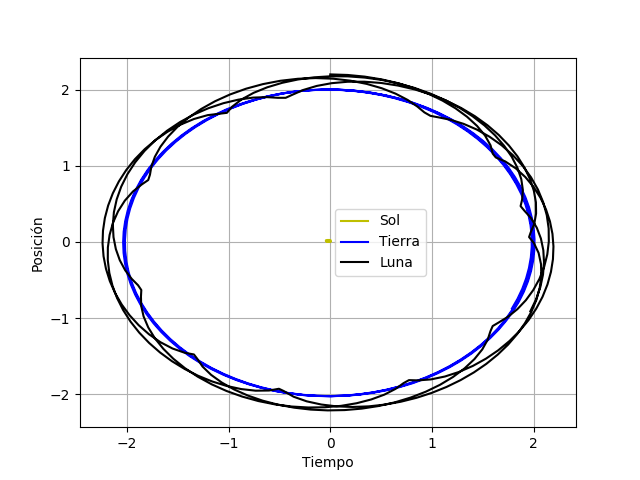

In [7]:
import matplotlib.pyplot as plt
x0 = [ -.02, 2.828, 3.4,0, 0, -0,0,0,0,0, 2, 2.2] # Estado inicial
t = np.linspace(0, 15, 300) # tiempo
lineas = integrate.odeint(dx, x0, t).T # resolver problema de ODE
plt.plot(lineas[6],lineas[9],'y', label= 'Sol')
plt.plot(lineas[7],lineas[10],'b', label= 'Tierra')
plt.plot(lineas[8],lineas[11],'k', label= 'Luna')
plt.legend(loc='center left', bbox_to_anchor=(.5,0.5))
xsol = lineas[6]
ysol = lineas[9]
xtie = lineas[7]
ytie = lineas[10]
xlun = lineas[8]
ylun = lineas[11]

#plt.xlim(-3,3)
#plt.ylim(-3,3)
plt.xlabel('Tiempo')
plt.ylabel('Posición')
plt.grid()


<IPython.core.display.Javascript object>


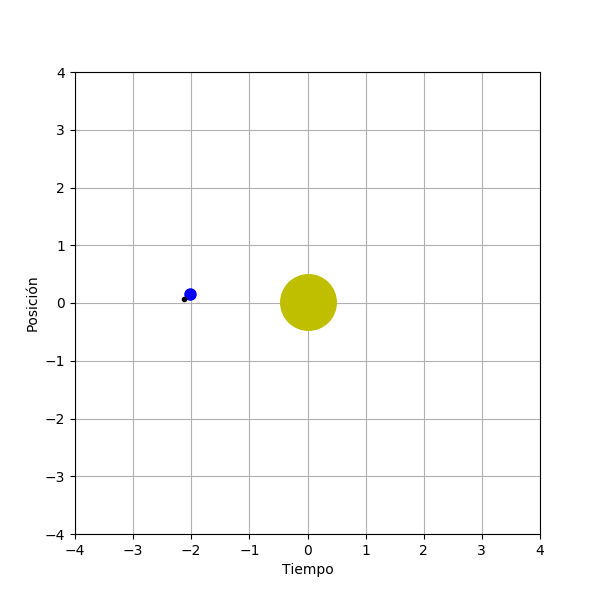

In [10]:
#Generar la animación
fig, ax = plt.subplots(figsize=(6,6))
ax.set_ylim([-4, 4])
ax.set_xlim([-4, 4])
sol, = ax.plot([], [], 'yo', ms=40)
tierra, = ax.plot([], [], 'bo', ms=8)
luna, = ax.plot([], [], 'ko', ms=3)
def init():
    sol.set_data([], [])
    tierra.set_data([], [])
    luna.set_data([], [])
def update(n):
    sol.set_data([xsol[n]], [ysol[n]])
    tierra.set_data([xtie[n]], [ytie[n]])
    luna.set_data([xlun[n]], [ylun[n]])
anim = animation.FuncAnimation(fig, update, init_func = init, interval = 150, frames=len(xtie), blit = False)
plt.xlabel('Tiempo')
plt.ylabel('Posición')
plt.grid()

In [ ]:
HTML(anim.to_html5_video())